# Introduction

Most differential equations cannot be solved by exact formulas. This does not prevent us from carrying a qualitative analysis, but at some point it may be necessary to find actual numerical values for solutions, or make accurate plots.

In this tutorials, we will study the numerical methods `scipy` provides for solving initial value problems. We will also consider the question of getting accurate approximations to equilibrium points. As usual, we load `pylab`. 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# First-order, one-dimensional DEs.

Let's consider the differntial equation:
$$
\newcommand{\mtab}{\quad\quad\quad\quad}
\mtab \dot{x} = \gamma(t)-\sin(x)
$$
This can be interpreted as an overdamped pendulum subject to an external, time varying, torque $\gamma(t)$. Notice that this is a nonautonomous system. Except in very special cases for the function $\gamma(t)$, this differential equation will not have a closed-form solution.

For definiteness, let's suppose that the external torque has the form $\gamma(t)=A\sin(\omega t)$, so we want to solve the differential equation:
$$
\mtab \dot{x} = A\sin(\omega t) - \sin(x)
$$
Let's suppose first that $A=1$ and \omega=0.25$. We will see later how to deal with changing parameters.

Solving a differential equation is a four-step process:

- Define a Python function that specifies the flow (the right hand side of the equation).
- Choose the times at which the solution is to be computed.
- Choose the initial condition.
- Call the numerical solver

The numerical solver we are going to use is `odeint`, which is in the `scipy.integrate` library:

In [3]:
from scipy.integrate import odeint

Let's now define the function $f(x,t)=\sin(0.25t)-\sin(x)$. Since this is a simple function, we just use a lambda-function. Notice that it is a function of two variables, $x$ and $t$.

In [24]:
de = lambda x, t: sin(0.25 * t) - sin(x) 

Let's solve the differential equation with initial condition $x(0)=1.5$ and want the solution at times $0.0$, $0.1$, $0.2$,$\dots$ $2.0$. This is how to do it:

In [25]:
t = arange(0,2.1,0.1)
x0 = 1.5
x = odeint( de, x0, t)

Nothing is printed, since we assigned the solution to the array `x`. Let's print a table of values:

In [26]:
for tt, xx in zip(t,x):
    print '{} {}'.format(tt,xx)

0.0 [ 1.5]
0.1 [ 1.40200993]
0.2 [ 1.30812087]
0.3 [ 1.21909249]
0.4 [ 1.13551857]
0.5 [ 1.05782075]
0.6 [ 0.98625507]
0.7 [ 0.92092797]
0.8 [ 0.86181792]
0.9 [ 0.80879968]
1.0 [ 0.76166788]
1.1 [ 0.72015908]
1.2 [ 0.68397072]
1.3 [ 0.65277681]
1.4 [ 0.6262405]
1.5 [ 0.60402367]
1.6 [ 0.58579403]
1.7 [ 0.57123025]
1.8 [ 0.56002507]
1.9 [ 0.55188787]
2.0 [ 0.54654558]


Notice that the solution is given as a vector (with a single element). `odeint` always interprets the problem as a system, even if it is a single differential equation. Usually, we will want to plot the solution:

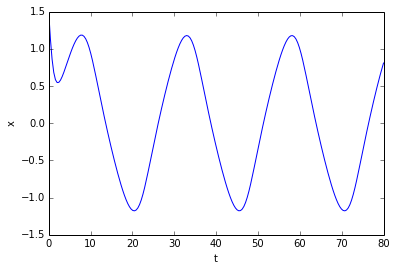

In [27]:
t = linspace(0,80,200)
x0 = 1.5
x = odeint( de, x0, t)
plot(t,x)
xlabel('t')
ylabel('x')

It seems that the solution quiclkly converges to a periodic oscillation with period about 45. Is this behavior valid for all initial conditions? Is the limiting periodic function the same for all initial condition? Let's plot the solution for several different initial conditions:

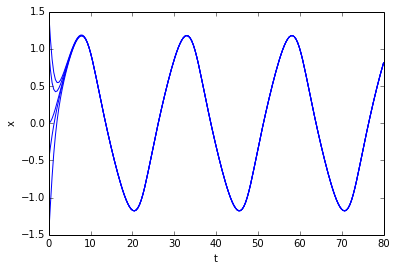

In [28]:
t = linspace(0,80,200)
ic = [-1.5, -0.5, 0.0, 1.0, 1.5]
for x0 in ic:
    x = odeint( de, x0, t )
    plot( t, x, color = 'blue' )
xlabel('t')
ylabel('x')

So we see that the solution quickly converges to the periodic oscillaton, for any of the initial conditions tried.

# Parameters

We can now ask if the same behavior holds for all amplitudes $A$ and frequencies $\omega$. We want to be able to solve the differential equation for several values of the parameters. To do this easily, we define a function factory:

In [29]:
def make_de(A, omega):
    f = lambda x, t: A * sin(omega * t) - sin(x)
    return f

As an example, let's see the effect of different amplitudes, for the fixed frequency $0.25$